In [1]:
import ee 
import geemap
geemap.ee_initialize()

# Exporting images

In [2]:
Map = geemap.Map()

image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318').select(
    ['B5', 'B4', 'B3']
)

vis_params = {'min': 0, 'max': 0.5, 'gamma': [0.95, 1.1, 1]}

Map.centerObject(image, 8)
Map.addLayer(image, vis_params, 'Landsat')
Map

Map(center=[37.47164678275328, -122.14450014746849], controls=(WidgetControl(options=['position', 'transparent…

In [3]:
region = ee.Geometry.BBox(-122.5955, 37.5339, -122.0982, 37.8252)
fc = ee.FeatureCollection(region)
style = {'color': 'ffff00ff', 'fillColor': '00000000'}
Map.addLayer(fc.style(**style), {}, 'ROI')
Map

Map(bottom=25699.0, center=[37.47921744485059, -121.27807617187501], controls=(WidgetControl(options=['positio…

# To local Drive

not allow to direct download the whole Landsat images (file size too big)

In [4]:
geemap.ee_export_image(image, filename= 'landsat.tif', scale=30, region=region)

Generating URL ...
Please wait ...
Data downloaded to c:\Users\zyang\spatial_data_management\notes\landsat.tif


# Projection

In [5]:

projection = image.select(0).projection().getInfo()
projection

{'type': 'Projection',
 'crs': 'EPSG:32610',
 'transform': [30, 0, 460785, 0, -30, 4264215]}

In [6]:
crs = projection['crs']
crs_transform = projection['transform']

In [7]:
geemap.ee_export_image(
    image,
    filename="landsat_crs.tif",
    crs=crs,
    crs_transform=crs_transform,
    region=region,
)
     

Generating URL ...
Please wait ...
Data downloaded to c:\Users\zyang\spatial_data_management\notes\landsat_crs.tif


## No restrcition way (download the large data file)

`geemap.download_ee_image`

slice the images, and download it piece by piece

In [8]:
geemap.download_ee_image(image, filename='landsat_full.tif', scale=60)

landsat_full.tif: |          | 0.00/179M (raw) [  0.0%] in 00:00 (eta:     ?)

## fishnet method

In [10]:
fishnet= geemap.fishnet(image.geometry(), rows=4, cols=4, delta= 0.5)
style={'color':'ffff00ff', 'fillColor':'00000000'}
Map.addLayer(fishnet.style(**style), {}, 'Fishnet')
Map

Map(bottom=25699.0, center=[37.47921744485059, -121.27807617187501], controls=(WidgetControl(options=['positio…

In [11]:
outdir= 'tiles'
geemap.download_ee_image_tiles(
    image,
    fishnet,
    outdir,
    prefix='landsat_',
    crs= 'EPSG:3857',
    scale= 30
)

landsat_01.tif: |          | 0.00/71.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_02.tif: |          | 0.00/71.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_03.tif: |          | 0.00/71.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_04.tif: |          | 0.00/71.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_05.tif: |          | 0.00/71.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_06.tif: |          | 0.00/71.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_07.tif: |          | 0.00/71.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_08.tif: |          | 0.00/71.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_09.tif: |          | 0.00/72.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_10.tif: |          | 0.00/72.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_11.tif: |          | 0.00/72.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_12.tif: |          | 0.00/72.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_13.tif: |          | 0.00/72.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_14.tif: |          | 0.00/72.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_15.tif: |          | 0.00/72.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_16.tif: |          | 0.00/72.7M (raw) [  0.0%] in 00:00 (eta:     ?)

Downloaded 16 tiles in 79.63249635696411 seconds.


# Similar and faster way
`geemap.download_ee_image_tiles_parallel`

In [15]:
out_dir= 'tiles2'
geemap.download_ee_image_tiles_parallel(
    image,
    fishnet,
    out_dir,
    prefix='landsat_',
    crs= 'EPSG:3857',
    scale= 120,
)

Finished in 12.456342697143555 seconds.


# To Google Drive

Run on space, store the data in google drive

Run on backspace

pros: work for large datasets

cons: need to wait

In [19]:
# need change authenticate settings
geemap.ee_export_image_to_drive(image, description='landsat_image', folder='export', region=region, scale=30)

# To mumpy array

small dataset

In [21]:
region = ee.Geometry.BBox(-122.5003, 37.7233, -122.3410, 37.8026)
rgb_img = geemap.ee_to_numpy(image, region=region)

In [22]:
print(rgb_img.shape)

(298, 471, 3)


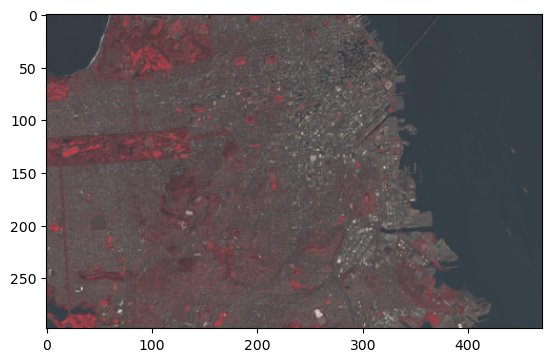

In [23]:
import matplotlib.pyplot as plt

rgb_img_test = (255 * ((rgb_img[:, :, 0:3]) + 0.2)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()
     